In [19]:
from cumulant import csolve
from qutip import Qobj,sigmaz,sigmax
from qutip.solver.heom import DrudeLorentzPadeBath,HEOMSolver
import numpy as np

In [6]:
w0 = 1
Deltaw = 1e-2*w0
alpha = 0.05
gamma = 5*w0
T = 1*w0
tf = 4
t=np.linspace(0,tf,100)
Hsys = sigmaz()/2
Q = sigmax()

In [7]:
cc = csolve(Hsys,t , 1e-4, alpha, gamma, T, Q, "od")

In [8]:
rho0=0.5*Qobj([[1,1],[1,1]])

In [10]:
result=cc.evolution(rho0)

Calculating Integrals ...:   0%|          | 0/4 [00:00<?, ?it/s]

Computing Exponential of Generators . . . .: 100%|██████████| 100/100 [00:00<00:00, 2883.18it/s]


In [12]:
import matplotlib.pyplot as plt

In [13]:
def population(den, a, b):
    return [den[i][a, b] for i in range(len(den))]

In [24]:
bath = DrudeLorentzPadeBath(Q=Q, lam=alpha*np.pi, gamma=gamma, T=T, Nk=8)
solver = HEOMSolver(Hsys, bath, max_depth=5)
result_h = solver.run(rho0, t)

10.1%. Run time:   0.48s. Est. time left: 00:00:00:04
20.2%. Run time:   1.06s. Est. time left: 00:00:00:04
30.3%. Run time:   1.58s. Est. time left: 00:00:00:03
40.4%. Run time:   2.14s. Est. time left: 00:00:00:03
50.5%. Run time:   2.70s. Est. time left: 00:00:00:02
60.6%. Run time:   3.34s. Est. time left: 00:00:00:02
70.7%. Run time:   3.98s. Est. time left: 00:00:00:01
80.8%. Run time:   4.58s. Est. time left: 00:00:00:01
90.9%. Run time:   5.16s. Est. time left: 00:00:00:00
100.0%. Run time:   5.70s. Est. time left: 00:00:00:00
Total run time:   5.70s


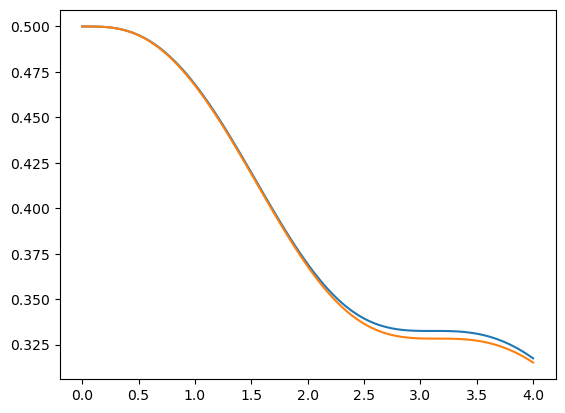

In [27]:
plt.plot(t,np.abs(population(result,0,1)))
plt.plot(t, np.abs(population(result_h.states, 0, 1)))
plt.show()